# Colby Snoke 
## 11/28/2022

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import statistics as stats
import numpy as np

In [4]:
#read in data 
fortnite = "all_weapons_fortnite - Sheet1.csv"
fortnite = pd.read_csv(fortnite, parse_dates=True)

In [5]:
#check to make sure data is in variable
fortnite

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
0,Common,Assault Rifle,165.0,30.0,5.5,30,2.52
1,Uncommon,Assault Rifle,170.5,31.0,5.5,30,2.41
2,Rare,Assault Rifle,181.5,33.0,5.5,30,2.30
3,Epic,Assault Rifle,192.5,35.0,5.5,30,2.18
4,Legendary,Assault Rifle,198.0,36.0,5.5,30,2.07
...,...,...,...,...,...,...,...
264,Epic,Mechanical Shockwave Bow,89.0,89.0,1.0,1,1.00
265,Legendary,Mechanical Shockwave Bow,94.0,94.0,1.0,1,1.00
266,Epic,Mechanical Explosive Bow,89.0,89.0,1.0,1,1.00
267,Legendary,Mechanical Explosive Bow,94.0,94.0,1.0,1,1.00


### Exploratory Analysis

In [6]:
fortnite.describe()

,DPS,Damage,Fire Rate,Magazine Size,Reload Time
count,269.000000,269.000000,269.000000,269.000000,269.000000
mean,132.063978,54.451301,4.396543,14.011152,2.988773
std,63.608301,31.883389,4.338670,13.376713,1.503436
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,27.000000,1.000000,5.000000,2.100000
50%,132.000000,44.000000,3.750000,8.000000,2.520000
75%,179.400000,79.000000,6.750000,24.000000,3.600000
max,319.580000,160.000000,20.000000,100.000000,9.240000


In [7]:
fortnite.shape

(269, 7)

In [8]:
fortnite.dtypes

Rarity            object
Weapon            object
DPS              float64
Damage           float64
Fire Rate        float64
Magazine Size      int64
Reload Time      float64
dtype: object

In [9]:
fortnite.head()

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
0,Common,Assault Rifle,165.0,30.0,5.5,30,2.52
1,Uncommon,Assault Rifle,170.5,31.0,5.5,30,2.41
2,Rare,Assault Rifle,181.5,33.0,5.5,30,2.30
3,Epic,Assault Rifle,192.5,35.0,5.5,30,2.18
4,Legendary,Assault Rifle,198.0,36.0,5.5,30,2.07


In [10]:
fortnite.tail()

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
264,Epic,Mechanical Shockwave Bow,89.0,89.0,1.0,1,1.0
265,Legendary,Mechanical Shockwave Bow,94.0,94.0,1.0,1,1.0
266,Epic,Mechanical Explosive Bow,89.0,89.0,1.0,1,1.0
267,Legendary,Mechanical Explosive Bow,94.0,94.0,1.0,1,1.0
268,Common,Harvesting Tool,32.0,20.0,1.6,0,0.0


In [11]:
fortnite.sample()

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
119,Mythic,Evochrome Shotgun,294.0,98.0,1.5,8,4.8


In [12]:
fortnite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rarity         269 non-null    object 
 1   Weapon         269 non-null    object 
 2   DPS            269 non-null    float64
 3   Damage         269 non-null    float64
 4   Fire Rate      269 non-null    float64
 5   Magazine Size  269 non-null    int64  
 6   Reload Time    269 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 14.8+ KB


In [13]:
fortnite.columns

Index(['Rarity', 'Weapon', 'DPS', 'Damage', 'Fire Rate', 'Magazine Size',
       'Reload Time'],
      dtype='object')

# Part 3: Cleaning

## My exploratory analysis highlighted nothing that needs to be cleaned. There were no NaN values that need to filed in. If there were NaN values, I would compare the gun to similar types and enter a value that seemed logical with the rarity of the gun. The column names are all easy to understand and clearly display the values in the column.  I decided to not focus on the latest season because it just ended the other day and the conclusions I would come to don't matter anymore. A new season began with new weapons that are not in the data. 

# Part 4: Answering Questions

### Question 1: Which weapon has the quickest average reload time?

In [14]:
subset_reload = fortnite[["Rarity", "Weapon", "Reload Time"]]
subset_reload.tail()

,Rarity,Weapon,Reload Time
264,Epic,Mechanical Shockwave Bow,1.0
265,Legendary,Mechanical Shockwave Bow,1.0
266,Epic,Mechanical Explosive Bow,1.0
267,Legendary,Mechanical Explosive Bow,1.0
268,Common,Harvesting Tool,0.0


In [15]:
subset_reload[subset_reload['Reload Time'] == subset_reload['Reload Time'].min()]

,Rarity,Weapon,Reload Time
235,Grenade,100,0.0
268,Common,Harvesting Tool,0.0


### Question 2:   Is there a clear best gun in the game? (Largest magazine, quickest reload time, and quickest fire rate)

In [18]:
subset_best = fortnite[["Rarity", "Magazine Size", "Weapon", "Reload Time","Fire Rate" ]]
subset_best

,Rarity,Magazine Size,Weapon,Reload Time,Fire Rate
0,Common,30,Assault Rifle,2.52,5.5
1,Uncommon,30,Assault Rifle,2.41,5.5
2,Rare,30,Assault Rifle,2.30,5.5
3,Epic,30,Assault Rifle,2.18,5.5
4,Legendary,30,Assault Rifle,2.07,5.5
...,...,...,...,...,...
264,Epic,1,Mechanical Shockwave Bow,1.00,1.0
265,Legendary,1,Mechanical Shockwave Bow,1.00,1.0
266,Epic,1,Mechanical Explosive Bow,1.00,1.0
267,Legendary,1,Mechanical Explosive Bow,1.00,1.0


In [19]:
subset_best[subset_best['Magazine Size'] == subset_best['Magazine Size'].max()]

,Rarity,Magazine Size,Weapon,Reload Time,Fire Rate
252,Rare,100,Light Machine Gun,5.0,8.0
253,Epic,100,Light Machine Gun,4.7,8.0


In [21]:
subset_best[subset_best['Fire Rate'] == subset_best['Fire Rate'].max()]

,Rarity,Magazine Size,Weapon,Reload Time,Fire Rate
40,Epic,2,Scoped Assault Rifle,2.2,20.0
41,Legendary,2,Scoped Assault Rifle,2.1,20.0


###   Question 3: What is the average reload time of shotguns versus submachine guns?

In [23]:
subset_shot = fortnite.loc[fortnite.Weapon.str.contains('Shotgun')]
subset_shot

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
61,Common,Pump Shotgun,58.80,91.0,0.70,5,5.10
62,Uncommon,Pump Shotgun,64.40,96.0,0.70,5,4.75
63,Rare,Pump Shotgun,70.00,102.0,0.70,5,4.40
64,Epic,Pump Shotgun,75.60,108.0,0.70,5,4.05
65,Legendary,Pump Shotgun,81.20,114.0,0.70,5,3.70
66,Common,Makeshift Shotgun,110.00,88.0,1.25,2,3.50
67,Uncommon,Makeshift Shotgun,116.25,93.0,1.25,2,3.00
68,Rare,Makeshift Shotgun,122.50,98.0,1.25,2,2.50
69,Uncommon,Primal Shotgun,216.60,57.0,3.80,12,3.90
70,Rare,Primal Shotgun,228.00,60.0,3.80,12,3.80


In [28]:
subset_shot['Reload Time'].mean()

5.0039655172413795

In [30]:
subset_sub = fortnite.loc[fortnite.Weapon.str.contains('Submachine')]
subset_sub

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
120,Common,Submachine Gun,160.0,16.0,10.0,30,2.31
121,Uncommon,Submachine Gun,170.0,17.0,10.0,30,2.20
122,Rare,Submachine Gun,180.0,18.0,10.0,30,2.10
123,Epic,Submachine Gun,190.0,19.0,10.0,35,2.00
124,Legendary,Submachine Gun,200.0,20.0,10.0,35,1.89
134,Common,Suppressed Submachine Gun,156.0,20.0,7.8,30,2.10
135,Uncommon,Suppressed Submachine Gun,163.8,21.0,7.8,30,2.10
136,Rare,Suppressed Submachine Gun,171.6,22.0,7.8,30,2.00
137,Epic,Suppressed Submachine Gun,179.4,23.0,7.8,30,1.90
138,Legendary,Suppressed Submachine Gun,187.2,24.0,7.8,30,1.80


In [31]:
subset_sub['Reload Time'].mean()

2.0428571428571427

### Question 4:     Overall which Assault Rifle deals the most damage per magazine(damage*magazine)?

In [39]:
subset_assault = fortnite.loc[fortnite.Weapon.str.contains('Assault')]
subset_assault

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
0,Common,Assault Rifle,165.00,30.0,5.50,30,2.52
1,Uncommon,Assault Rifle,170.50,31.0,5.50,30,2.41
2,Rare,Assault Rifle,181.50,33.0,5.50,30,2.30
3,Epic,Assault Rifle,192.50,35.0,5.50,30,2.18
4,Legendary,Assault Rifle,198.00,36.0,5.50,30,2.07
12,Mythic,Skye’s Assault Rifle,222.00,37.0,6.00,30,2.00
13,Common,Heavy Assault Rifle,140.25,33.0,4.25,25,3.08
14,Uncommon,Heavy Assault Rifle,148.75,35.0,4.25,25,2.94
15,Rare,Heavy Assault Rifle,157.25,37.0,4.25,25,2.80
16,Epic,Heavy Assault Rifle,165.75,42.0,4.25,25,2.66


In [56]:
subset_assault2 = subset_assault[["Rarity", "Weapon", "Damage", "Magazine Size" ]]
subset_assault2

,Rarity,Weapon,Damage,Magazine Size
0,Common,Assault Rifle,30.0,30
1,Uncommon,Assault Rifle,31.0,30
2,Rare,Assault Rifle,33.0,30
3,Epic,Assault Rifle,35.0,30
4,Legendary,Assault Rifle,36.0,30
12,Mythic,Skye’s Assault Rifle,37.0,30
13,Common,Heavy Assault Rifle,33.0,25
14,Uncommon,Heavy Assault Rifle,35.0,25
15,Rare,Heavy Assault Rifle,37.0,25
16,Epic,Heavy Assault Rifle,42.0,25


In [57]:
subset_assault2.columns = ['Rarity', 'Weapon', 'Damage', 'MagazineSize']
subset_assault2

,Rarity,Weapon,Damage,MagazineSize
0,Common,Assault Rifle,30.0,30
1,Uncommon,Assault Rifle,31.0,30
2,Rare,Assault Rifle,33.0,30
3,Epic,Assault Rifle,35.0,30
4,Legendary,Assault Rifle,36.0,30
12,Mythic,Skye’s Assault Rifle,37.0,30
13,Common,Heavy Assault Rifle,33.0,25
14,Uncommon,Heavy Assault Rifle,35.0,25
15,Rare,Heavy Assault Rifle,37.0,25
16,Epic,Heavy Assault Rifle,42.0,25


In [62]:
damagepermag = []
damagepermag = subset_assault2.Damage * subset_assault2.MagazineSize
damagepermag

0      900.0
1      930.0
2      990.0
3     1050.0
4     1080.0
12    1110.0
13     825.0
14     875.0
15     925.0
16    1050.0
17    1025.0
19     620.0
20     640.0
21     680.0
22     720.0
23     740.0
24     780.0
30     900.0
31     960.0
32     990.0
33     660.0
34     690.0
35     720.0
36      72.0
37      74.0
38      64.0
39      68.0
40      72.0
41      74.0
50     540.0
51     580.0
52     600.0
53     640.0
54     660.0
55     700.0
dtype: float64

### Question 5:     Is the suppressed submachine gun or rapid fire submachine better to use?

In [73]:
subset_rapid = fortnite.loc[fortnite.Weapon.str.contains('Rapid')]
subset_rapid

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
139,Common,Rapid Fire SMG,195.0,13.0,15.0,20,1.65
140,Uncommon,Rapid Fire SMG,210.0,14.0,15.0,20,1.58
141,Rare,Rapid Fire SMG,225.0,15.0,15.0,20,1.50
142,Epic,Rapid Fire SMG,240.0,16.0,15.0,26,1.42
143,Legendary,Rapid Fire SMG,255.0,17.0,15.0,26,1.32


In [50]:
subset_rapid2 = subset_rapid[["Weapon","DPS"]]
subset_rapid2

,Weapon,DPS
139,Rapid Fire SMG,195.0
140,Rapid Fire SMG,210.0
141,Rapid Fire SMG,225.0
142,Rapid Fire SMG,240.0
143,Rapid Fire SMG,255.0


In [52]:
subset_rapid2['DPS'].mean()

225.0

In [68]:
subset_sup = fortnite.loc[fortnite.Weapon.str.contains('Suppressed Sub')]
subset_sup

,Rarity,Weapon,DPS,Damage,Fire Rate,Magazine Size,Reload Time
134,Common,Suppressed Submachine Gun,156.0,20.0,7.8,30,2.1
135,Uncommon,Suppressed Submachine Gun,163.8,21.0,7.8,30,2.1
136,Rare,Suppressed Submachine Gun,171.6,22.0,7.8,30,2.0
137,Epic,Suppressed Submachine Gun,179.4,23.0,7.8,30,1.9
138,Legendary,Suppressed Submachine Gun,187.2,24.0,7.8,30,1.8


In [54]:
subset_sup2 = subset_sup[["Weapon","DPS"]]
subset_sup2

,Weapon,DPS
134,Suppressed Submachine Gun,156.0
135,Suppressed Submachine Gun,163.8
136,Suppressed Submachine Gun,171.6
137,Suppressed Submachine Gun,179.4
138,Suppressed Submachine Gun,187.2


In [55]:
subset_sup2['DPS'].mean()

171.6

# Key plots
### comparing the suppressed and rapid submachine guns with in eah group.

Text(0.5, 1.0, 'All suppressed submachine guns have slightly different DPS')

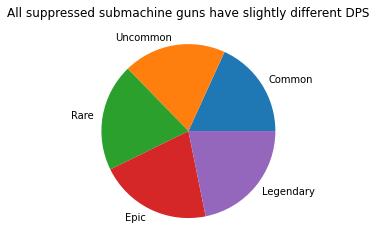

In [76]:
plt.pie(subset_sup.DPS,labels=subset_sup.Rarity)
plt.title('All suppressed submachine guns have slightly different DPS')

Text(0.5, 1.0, 'All rapid submacine guns have slightly different DPS as well')

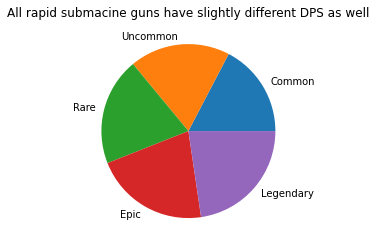

In [77]:
plt.pie(subset_rapid.DPS,labels=subset_rapid.Rarity)
plt.title('All rapid submacine guns have slightly different DPS as well')